<a href="https://colab.research.google.com/github/spandit98/Hotel-Booking-EDA-Analysis/blob/main/Hotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**
Hotel and hospitality business has been an exceedingly lucrative medium for quite a few generations now. Startups are coming up with unique ideas to enter the market and exponentiate their business in a short time. Well, there are even old players on the field who anyway would try to stay relevant for as long as possible, amongst these new business owners. So, to match up to the competition, the startups would look for the most welcoming business in the relative market. One such startup wants to look for the most profitable line in the market, for which it has been given the data set of each from two kinds of hotels, Resort hotel and City hotel. This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Our motive will be to analyse the data and suggest them the factors which determine their growth rate in the market.

Firstly, we will do the cleaning process of the data by removing the null values.

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hotel_dir = ('/content/drive/MyDrive/')
hotel_booking = pd.read_csv(hotel_dir + '/Copy of Hotel Bookings.csv')

In [ ]:
hotel_booking.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_booking.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
hotel_booking.shape

(119390, 32)

In [ ]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
null_value_replacement={'country':0,'agent':0,'company':0,'children':0}
hotel_booking=hotel_booking.fillna(null_value_replacement)

In [ ]:
hotel_booking.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
hotel_booking.describe(include=['object','bool'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,178,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [ ]:
hotel_booking.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel_booking.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

##**Motivation**

To analyse the market precisely, we have planned to bifurcate the analysis into a set of questions on which we would work up on,

### 1. Which hotel has the most number of bookings throughout?

In [ ]:
obj=[]
for i in hotel_booking:
  if hotel_booking[i].dtype=='O':
    obj.append(i)
print(len(obj))
print(obj)
  

12
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [ ]:

new_hotel_booking=hotel_booking.groupby('hotel')['hotel'].count()
new_hotel_booking

hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

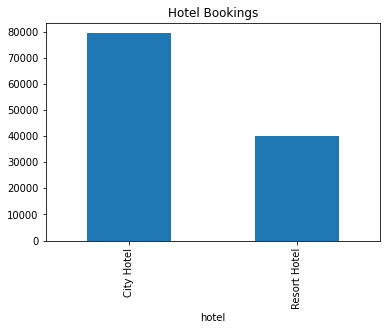

In [ ]:
b=new_hotel_booking.plot(kind='bar', title = 'Hotel Bookings')

It is observed that the City Hotel had almost 100% more bookings than the Resort Hotel.

### 2. Which year had the most bookings?

In [ ]:
new_hotel_booking=hotel_booking.groupby('arrival_date_year')['hotel'].count()
new_hotel_booking

arrival_date_year
2015    21996
2016    56707
2017    40687
Name: hotel, dtype: int64

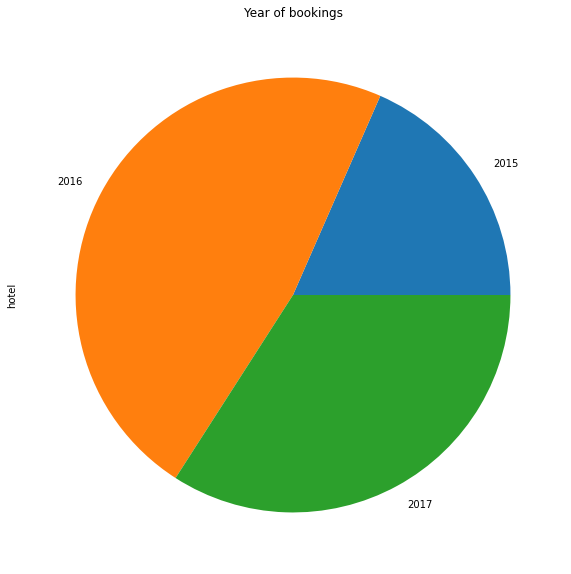

In [ ]:
diagram=new_hotel_booking.plot(kind='pie', figsize = (15,10), title = 'Year of bookings')

It seems that the year 2016 had the most number of bookings than the other years.

### 3. Which month had most number of guests in both hotels?

In [ ]:
hb = hotel_booking.groupby('arrival_date_month')['arrival_date_month'].count().sort_values(ascending = False)
hb

arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [ ]:
y = pd.DataFrame(hotel_booking['arrival_date_month'].value_counts())
x = y.reset_index()
x.columns = ['arrival_date_month','counts']
x

,arrival_date_month,counts
0,August,13877
1,July,12661
2,May,11791
3,October,11160
4,April,11089
5,June,10939
6,September,10508
7,March,9794
8,February,8068
9,November,6794


In [ ]:
hotel_booking['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

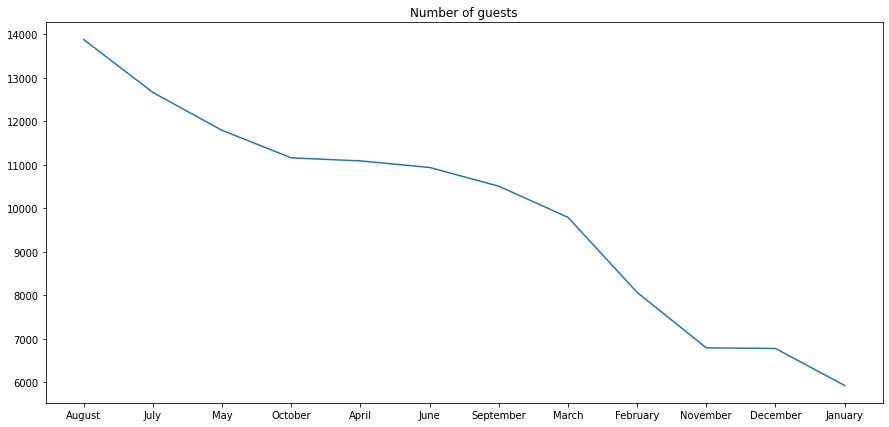

In [ ]:
figsize=plt.figure(figsize = (15,7))
plt.plot(x['arrival_date_month'], x['counts'],)
plt.title("Number of guests")
plt.show()

It seems that most number of guests prefer to visit the hotels at that location during end-summer and monsoon, i.e. May, June, July, August. Amongst which, the month August had most number of guests.

### 4. Which specific hotel had most number of guests in which month?

In [ ]:
resort_hotel=hotel_booking[(hotel_booking['hotel']=='Resort Hotel')&(hotel_booking['is_canceled']==0)]

In [ ]:
city_hotel=hotel_booking[(hotel_booking['hotel']=='City Hotel')&(hotel_booking['is_canceled']==0)]

In [ ]:
resort_guests = resort_hotel['arrival_date_month'].value_counts().reset_index()
resort_guests.columns=['month','no of guests']
resort_guests

,month,no of guests
0,August,3257
1,July,3137
2,October,2577
3,March,2573
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2038
9,December,2017


In [ ]:
city_guests = city_hotel['arrival_date_month'].value_counts().reset_index()
city_guests.columns=['month','no of guests']
city_guests

,month,no of guests
0,August,5381
1,July,4782
2,May,4579
3,June,4366
4,October,4337
5,September,4290
6,March,4072
7,April,4015
8,February,3064
9,November,2696


In [ ]:
final_guests = resort_guests.merge(city_guests,on='month')
final_guests.columns=['month','no of guests in resort','no of guest in city hotel']
final_guests

,month,no of guests in resort,no of guest in city hotel
0,August,3257,5381
1,July,3137,4782
2,October,2577,4337
3,March,2573,4072
4,April,2550,4015
5,May,2535,4579
6,February,2308,3064
7,September,2102,4290
8,June,2038,4366
9,December,2017,2392


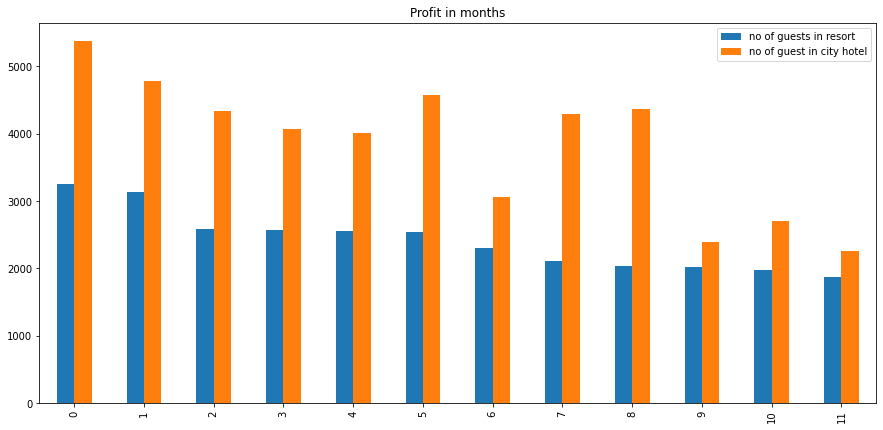

In [ ]:
final_guests.plot(kind = 'bar', figsize = (15,7), title = 'Profit in months')


It seems that the City Hotel had most number of guests in the month of August. Now let's see if there is any month where the Resort Hotel had greater number of guests than the City one, by determining any intersection on the line graphs.

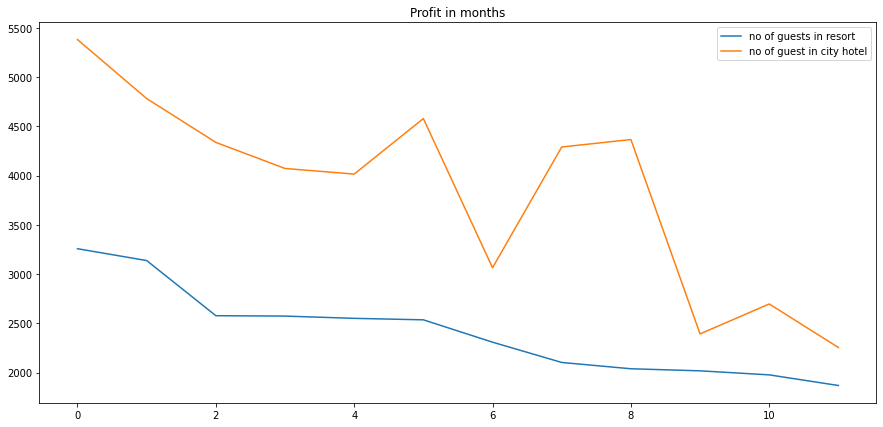

In [ ]:
final_guests.plot(kind = 'line', figsize = (15,7), title = 'Profit in months')

Seems like the business of Resort Hotel is nowhere near to that of City Hotel.

###5. Prefered part of the week by the guests

In [ ]:
week_data = pd.DataFrame(hotel_booking[['stays_in_weekend_nights', 'stays_in_week_nights']])
week_data

,stays_in_weekend_nights,stays_in_week_nights
0,0,0
1,0,0
2,0,1
3,0,1
4,0,2
...,...,...
119385,2,5
119386,2,5
119387,2,5
119388,2,5


In [ ]:
x = week_data.sum()

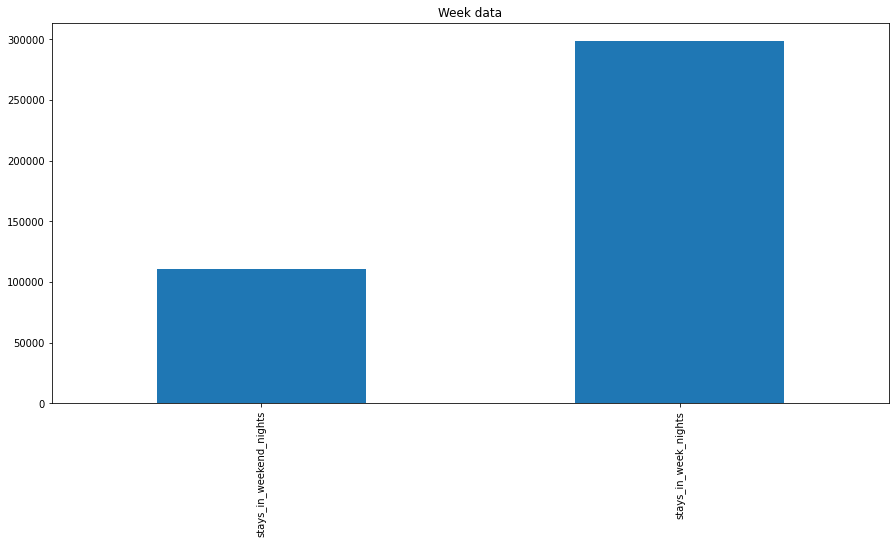

In [ ]:
x.plot(kind = 'bar', figsize = (15,7), title = 'Week data')

Seems that the people mostly tend to break the myth about hotels being occupied at weekends.

### 6. How high is the cancellation rate? How is the trend between the two hotels monthly?

In [ ]:

bookings=hotel_booking.is_canceled.value_counts()
bookings

0    75166
1    44224
Name: is_canceled, dtype: int64

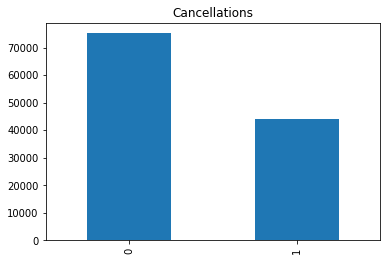

In [ ]:
diagram=bookings.plot(kind='bar', title = 'Cancellations')

Seems that a lot of guests tend to cancel their bookings but the confirmed, i.e. not cancelled trend is more among them. Now let's see the monthly stats about the same, for each of the hotels.

In [ ]:
resort_cancellation=hotel_booking[hotel_booking["hotel"]=="Resort Hotel"]["is_canceled"].value_counts()
city_cancellation=hotel_booking[hotel_booking['hotel']=='City Hotel']["is_canceled"].value_counts()
total_cancel=hotel_booking['is_canceled'].value_counts()

In [ ]:
resort_cancellation

0    28938
1    11122
Name: is_canceled, dtype: int64

In [ ]:
city_cancellation

0    46228
1    33102
Name: is_canceled, dtype: int64

In [ ]:
city_cancellation

0    46228
1    33102
Name: is_canceled, dtype: int64

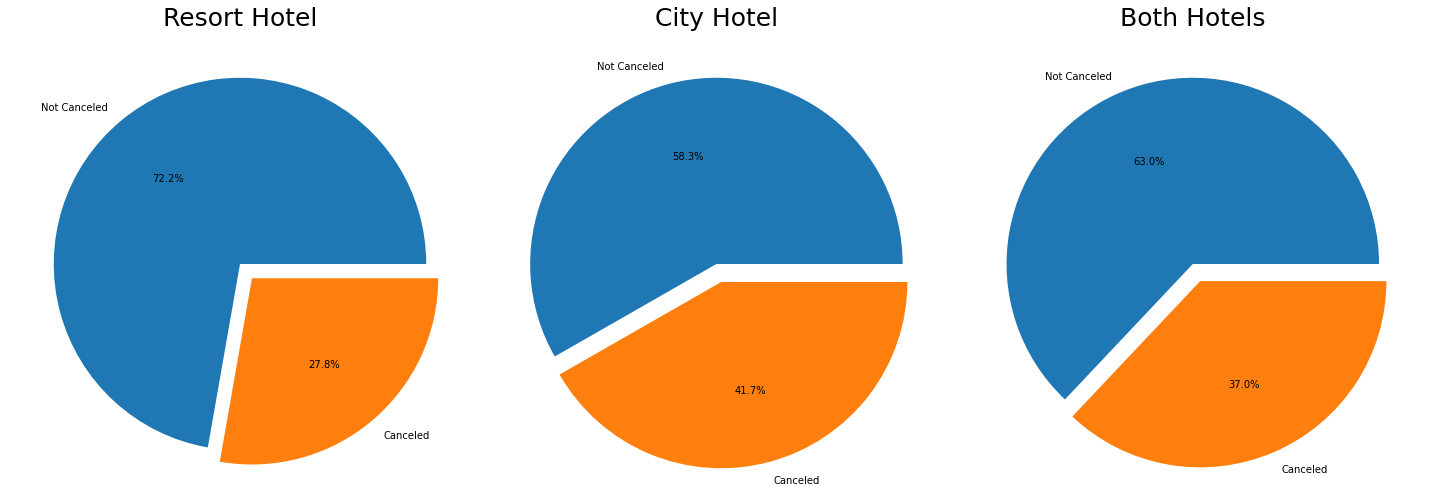

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(1,3,1)
plt.pie(resort_cancellation,labels=["Not Canceled","Canceled"], explode=[0, 0.1], autopct='%1.1f%%')
plt.title("Resort Hotel", fontsize=25)

plt.subplot(1,3,2)
plt.pie(city_cancellation,labels=["Not Canceled","Canceled"], explode=[0, 0.1], autopct='%1.1f%%')
plt.title("City Hotel", fontsize=25)####

plt.subplot(1,3,3)
plt.pie(total_cancel,labels=["Not Canceled","Canceled"], explode=[0, 0.1], autopct='%1.1f%%')
plt.title("Both Hotels", fontsize=25)

plt.tight_layout()

Almost 75% of the Resort hotel bookings are accomplished without any hurdle, but there's still seems to be an opportunity for correction of 25% of the canceled bookings.

The City hotel had more cancellations than the resort one over the time but, since it had more number of bookings, the trend would tend to fluctuate. Also, the probability of minimizing the cancellations can be opportunized.

###7. How many guests prefer to visit repetitively?

In [ ]:
hotel_booking.groupby(['is_repeated_guest'])['is_repeated_guest'].count()

is_repeated_guest
0    115580
1      3810
Name: is_repeated_guest, dtype: int64

Text(0.5, 1.0, 'Proportion of Repeated Guests')

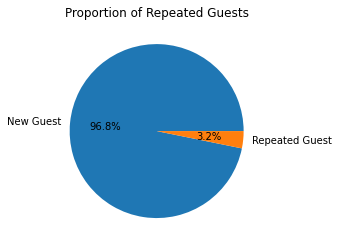

In [ ]:
plt.pie(hotel_booking["is_repeated_guest"].value_counts(), labels=["New Guest","Repeated Guest"],autopct='%1.1f%%')
plt.title ("Proportion of Repeated Guests")

Seems that not a much amount of guests prefer to visit the hotels in that area repititively. 

### 8. Which country has more number of repeated guests?

In [ ]:
repeated=pd.DataFrame(hotel_booking[hotel_booking["is_repeated_guest"]==1].groupby("country").count()["hotel"].sort_values(ascending=False).head(10))
repeated.reset_index(inplace=True)

In [ ]:
repeated

,country,hotel
0,PRT,3250
1,GBR,107
2,ESP,90
3,FRA,78
4,ITA,40
5,IRL,31
6,DEU,25
7,NLD,20
8,USA,19
9,AGO,18


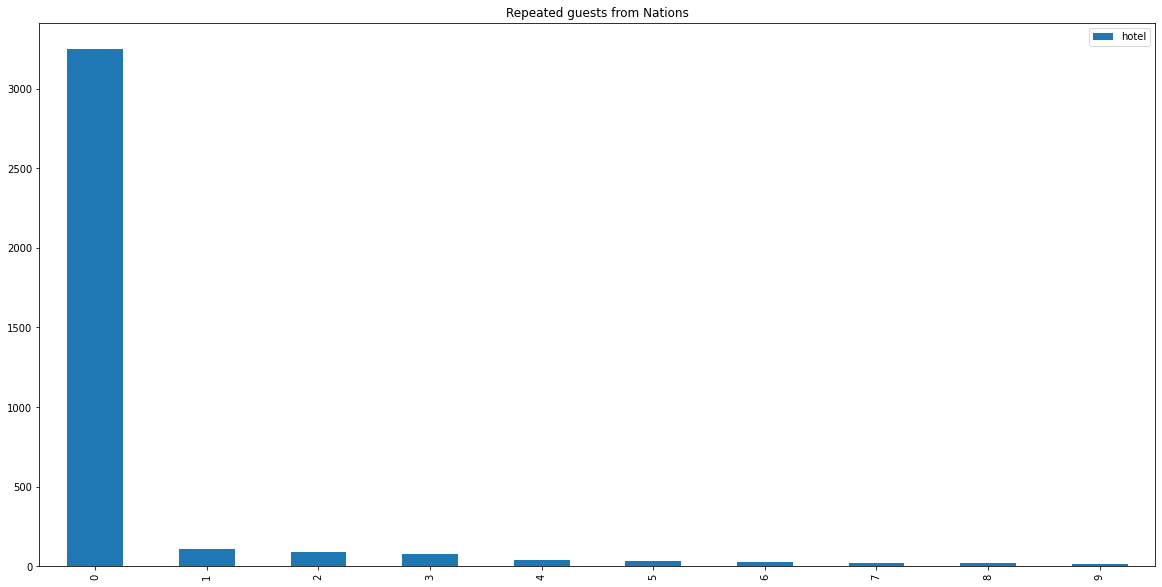

In [ ]:
repeated.plot(kind='bar', figsize = (20,10), title = 'Repeated guests from Nations')

Seems that the Portuguese prefer to visit the hotels in the area.

### 9. How many kids do we have the most among the hotels?

In [ ]:
children = hotel_booking.groupby('hotel')['children'].sum()
children

hotel
City Hotel      7248.0
Resort Hotel    5155.0
Name: children, dtype: float64

In [ ]:
cdf = pd.DataFrame(children).reset_index()
cdf

,hotel,children
0,City Hotel,7248.0
1,Resort Hotel,5155.0


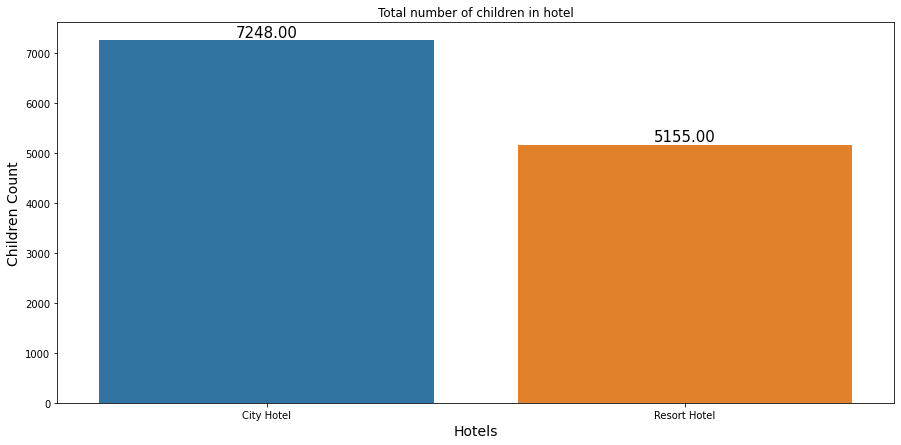

In [ ]:
# Importing seaborn library
# Plotting graph
import seaborn as sns
# Defining the plot size
plt.figure(figsize=(15, 7))


# From which datafarme the values are to be picked
plots = sns.barplot(x=cdf['hotel'], y=cdf['children'], data=cdf)


# Iterrating over the bars one-by-one
for bar in plots.patches:
    

    plots.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                size=15, xytext=(0, 8),
                textcoords='offset points')

# Setting the label for x-axis
plt.xlabel("Hotels", size=14)

# Setting the label for y-axis
plt.ylabel("Children Count", size=14)

# Setting the title for the graph
plt.title("Total number of children in hotel")

# Fianlly showing the plot
plt.show()

Seems that the city hotel welcomes the most number of children.

### 10. What are the types of meals that the corporates prefer in their visit?

In [ ]:
corporate_meal = hotel_booking.loc[hotel_booking['market_segment'] == 'Corporate', ['market_segment','meal']]

In [ ]:
cm = corporate_meal.groupby(['meal'])['meal'].count()
cm

meal
BB           5150
FB             14
HB             83
SC             33
Undefined      15
Name: meal, dtype: int64

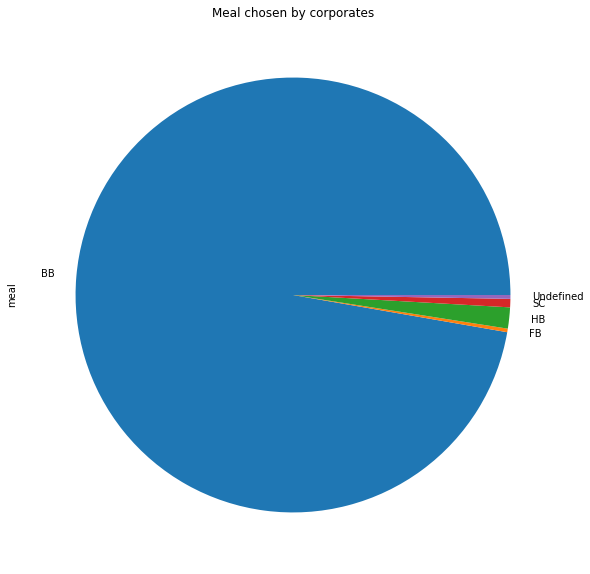

In [ ]:
cm.plot(kind = 'pie', figsize = (20,10), title = 'Meal chosen by corporates')

Seems that corporates mostly prefer Bed and Breakfast package at the hotel, i.e. they check-in at night and check-out by the next morning. 



### 11. How is the guest growth throughout the year?

In [ ]:
hotel_booking["arrival_date_month_year"]=hotel_booking["arrival_date_month"].astype("str")+" "+hotel_booking["arrival_date_year"].astype("str")

In [ ]:
hotel_booking["total_guest"]=hotel_booking["adults"]+hotel_booking["children"]

In [ ]:
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_year,total_guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,July 2015,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,July 2015,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,July 2015,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,July 2015,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,July 2015,2.0


In [ ]:
guest_resort=0
guest_city=0
guest_resort_monthly=[]
guest_city_monthly=[]

for month_year in hotel_booking["arrival_date_month_year"].unique():
  for i in range(len(hotel_booking)):
    if (hotel_booking["arrival_date_month_year"][i]==month_year)&(hotel_booking["is_canceled"][i]==0)&(hotel_booking["hotel"][i]=="Resort Hotel"):
      guest_resort+=hotel_booking["total_guest"][i]
    elif (hotel_booking["arrival_date_month_year"][i]==month_year)&(hotel_booking["is_canceled"][i]==0)&(hotel_booking["hotel"][i]=="City Hotel"):
      guest_city+=hotel_booking["total_guest"][i]
  guest_resort_monthly.append(guest_resort)
  guest_city_monthly.append(guest_city)

In [ ]:
hotel_booking["arrival_date_month_year"].unique()

array(['July 2015', 'August 2015', 'September 2015', 'October 2015',
       'November 2015', 'December 2015', 'January 2016', 'February 2016',
       'March 2016', 'April 2016', 'May 2016', 'June 2016', 'July 2016',
       'August 2016', 'September 2016', 'October 2016', 'November 2016',
       'December 2016', 'January 2017', 'February 2017', 'March 2017',
       'April 2017', 'May 2017', 'June 2017', 'July 2017', 'August 2017'],
      dtype=object)

In [ ]:
guestdf=pd.DataFrame(list(zip(hotel_booking["arrival_date_month_year"].unique(),guest_resort_monthly, guest_city_monthly)), columns=["Month_Year","Total Guest Resort Hotel", "Total Guest City Hotel"])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 <a list of 26 Text major ticklabel objects>)

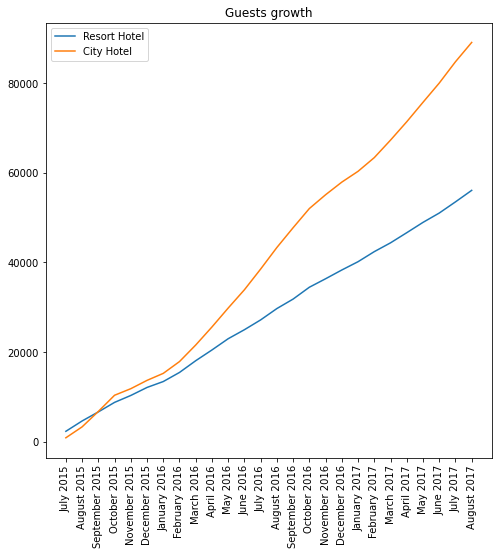

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(guestdf["Month_Year"], guestdf["Total Guest Resort Hotel"])
plt.plot(guestdf["Month_Year"], guestdf["Total Guest City Hotel"])
plt.title("Guests growth")
plt.legend(["Resort Hotel","City Hotel"])
plt.xticks(rotation=90)

Seems that there is a consistent growth in both hotels as per the amount of guests' arrivals during monsoon and winter, 2015. But there is a significant rise in the amount of arrivals in the City Hotel from spring, 2016 uptil the end of time of the data.

## **Summary Conclusion**

From the above analysis, we concluded that the hotel business tends to make more profit during the rainy season. The hotels can keep experimenting with their packages, interiors and amenities as there are more new guests than the repeated guests. City Hotel welcomes more children than the resort one, so they can add a seperate kids section, which will not only attract more kids by word of mouth but also increase the amount of repititive guests over the time. Speaking of repititive guests, there are most repititive guests from Portugal, which can help us build more Portuguese friendly dishes for the premium packages.
The corporates mostly prefer Bed and Breakfast package, due to which the hotel can add more features to the package, also can profit from the customisation feature.

An overall analysis suggests that the business aspect of City Hotel venture is much much more profitable than that of a Resort one, but if the investor sees potential in the business and is ready to invest more, a Resort Hotel will be a valuable add-on.